<font color='blue'> **w_plot_02_map_view_example** </font>   w05_freyberg

In [1]:
import os; from pathlib import Path ; import numpy as np ; import matplotlib.pyplot as plt ; from flopy.utils import PathlineFile ; from flopy.mf6 import MFSimulation
import flopy                  ; ref_data = Path('E:/15_REPOS/02_Beta-Me_GMDSI/_data/mf6-freyberg_flopy')   
import pandas as pd           ; ws = Path("./_RES/007_mp7")                     ; ws.mkdir(exist_ok=True)   
sim_name = 'freyberg'         ; sim = MFSimulation.load(sim_name =   sim_name, sim_ws = ref_data, verbosity_level=0)
sim.set_sim_path(ws)          ; sim.write_simulation()               ; sim.run_simulation(silent=True, report=False)     ; gwf = sim.get_model('freyberg')

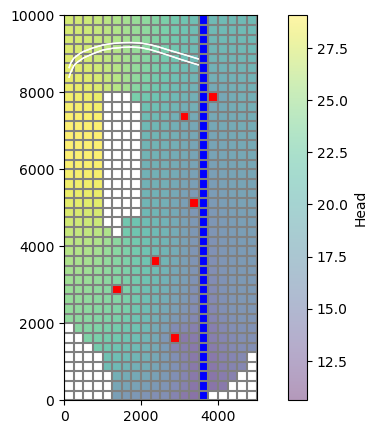

In [ ]:
X=0; x=0 ; Y=5; y=1               
#.....[[[000,YYY,XXX,000,yyy,xxx]]]..|y=0|x=0|..|X<=x|Y<=y|
xy  = [[[  0,  Y,  X,  0,Y+y,X+x]]]
celldata = flopy.modpath.CellDataType              (drape=0, columncelldivisions=1 , rowcelldivisions = 1  , layercelldivisions=1)
lrcpd    = flopy.modpath.LRCParticleData           (subdivisiondata = [celldata]   , lrcregions   = xy)
pgs       = flopy.modpath.ParticleGroupLRCTemplate (particlegroupname = f"a"       , particledata = lrcpd ,filename=f"{sim_name}.pg_A.sloc") 

mp    = flopy.modpath.Modpath7    (modelname = f"{sim_name}_mp" ,flowmodel = gwf ,exe_name = "mp7" ,model_ws = ws)
mpbas = flopy.modpath.Modpath7Bas (mp ,porosity = 0.1)
mpsim = flopy.modpath.Modpath7Sim (mp ,simulationtype = "combined" ,trackingdirection = "forward" ,budgetoutputoption = "summary" ,
                                  referencetime = [0,0,0.0] ,timepointdata = [1,[0]] ,zonedataoption = "on" ,particlegroups = pgs)
mp.write_input()                  ;mp.run_model(silent=True, report=False)

head=flopy.utils.HeadFile(ws/f"{'freyberg'}.hds") ; heads = head.get_data()   ; pff = PathlineFile(ws / mpsim.pathlinefilename) ;pll=pff.get_alldata() 

fig = plt.figure(figsize=(8, 5))        
ax = fig.add_subplot(1, 1, 1, aspect="equal")        
mv = flopy.plot.PlotMapView(model=gwf)  ; mv.plot_grid()                       ; hdd = mv.plot_array(heads, alpha=0.4)      
cb = plt.colorbar(hdd, shrink=1)      ; cb.set_label("Head")                   ; mv.plot_bc("RIV",color='blue') ; mv.plot_bc("WEL",color='red') 
mv.plot_pathline(pll, layer="all"       , alpha=1, colors=["white"], lw=1)     ; plt.show()
#pd.DataFrame(os.listdir(ref_data)).to_csv(ws/"00_LIST.csv")     ; os.startfile('E:/15_REPOS/02_Beta-Me_GMDSI/a_Beta/_RES/007_mp7/00_LIST.csv') 
#pd.DataFrame(os.listdir(ws)).to_csv(ws/"01_LIST.csv")           ; os.startfile('E:/15_REPOS/02_Beta-Me_GMDSI/a_Beta/_RES/007_mp7/01_LIST.csv') 
#os.startfile('E:/15_REPOS/02_Beta-Me_GMDSI/a_Beta/XLS/007_mp7_vtk.xlsx') 

In [3]:
(nrow, ncol)=(gwf.modelgrid.nrow , gwf.modelgrid.ncol); (nrow, ncol)

(40, 20)